In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib.animation as animation

from pathlib import Path

In [2]:
raw_Data_Folder = Path.cwd().joinpath('raw')
df_FallAllD_raw = pd.read_pickle(raw_Data_Folder.joinpath('FallAllD.pkl'))

processed_Data_Folder = Path.cwd().joinpath('processed')
df_FallAllD = pd.read_pickle(processed_Data_Folder.joinpath('FallAllD-Preliminary.pkl'))
df_SisFall = pd.read_pickle(processed_Data_Folder.joinpath('SisFall-Preliminary.pkl'))
df_UMAFall = pd.read_pickle(processed_Data_Folder.joinpath('UMAFall-Preliminary.pkl'))

## Raw Data Visualisation

In [3]:
fallAllD_ActivityID = {
    1: 'start clapping hands',
    2: 'clapping hands',
    3: 'stop clapping hands',
    4: 'clap hands one time',
    5: 'start waving hands',
    6: 'waving hands',
    7: 'stop waving hands',
    8: 'raising hand up',
    9: 'moving hand down',
    10: 'moving hand up then down immediately',
    11: 'hand shaking',
    12: 'beating a table with your hand',
    13: 'sitting down',
    14: 'standing up',
    15: 'fail to stand up from a sofa/chair (after half standing)',
    16: 'lying down on a bed',
    17: 'changing position (turning) in the bed',
    18: 'rising up from a bed',
    19: 'start walking',
    20: 'walking slowly or in moderate speed',
    21: 'stop walking',
    22: 'walking quickly',
    23: 'stumbling while walking without falling',
    43: 'start jogging',
    24: 'jogging slowly',
    44: 'stop jogging',
    25: 'jogging quickly',
    26: 'jumping slightly',
    27: 'jumping strongly',
    28: 'bending down (e.g. to pick something up from floor) and then raising up',
    29: 'start going upstairs',
    30: 'going upstairs',
    31: 'stop going upstairs',
    32: 'start going downstairs',
    33: 'going downstairs',
    34: 'stop going downstairs',
    35: 'going upstairs quickly',
    36: 'going downstairs quickly',
    37: 'start ascending using a lift',
    38: 'stop ascending using a lift',
    39: 'start descending using a lift',
    40: 'stop descending using a lift',
    41: 'standing in a moving bus/metro',
    42: 'sitting in a moving bus/metro',
    101: 'walking tripping falling forward \n with no rotation and no recovery action',
    102: 'walking tripping falling forward \n with no rotation and with recovery action',
    103: 'walking slipping falling forward \n with no rotation and no recovery action',
    104: 'walking slipping falling forward \n with no rotation and with recovery action',
    105: 'walking slipping falling forward \n with rotation and no recovery action',
    106: 'walking slipping falling forward \n with rotation and with recovery action',
    107: 'walking slipping falling backward \n with no rotation and no recovery action',
    108: 'walking slipping falling backward \n with no rotation and with recovery action',
    109: 'walking slipping falling backward \n with rotation and no recovery action',
    110: 'walking slipping falling backward \n with rotation and with recovery action',
    111: 'walking syncope falling backward \n with no rotation and no recovery action',
    112: 'walking syncope falling backward \n with no rotation and no recovery action',
    113: 'walking syncope falling lateral \n with no rotation and no recovery action',
    114: 'walking syncope falling forward \n with no rotation and no recovery action',
    116: 'attempting to sit/lie down losing balance falling forward \n with no rotation and no recovery action',
    117: 'attempting to sit/lie down losing balance falling backward \n with no rotation and no recovery action',
    118: 'attempting to sit/lie down losing balance falling backward \n with no rotation and with recovery action',
    119: 'attempting to sit/lie down losing balance falling lateral \n with no rotation and no recovery action',
    120: 'attempting to sit/lie down losing balance falling lateral \n with no rotation and with recovery action',
    121: 'jogging stumbling/tripping falling forward \n with no rotation and no recovery action',
    122: 'jogging stumbling/tripping falling forward \n with no rotation and with recovery action',
    123: 'jogging slipping falling forward \n with no rotation and no recovery action',
    124: 'jogging slipping falling forward \n with no rotation and with recovery action',
    125: 'jogging slipping falling forward \n with rotation and no recovery action',
    126: 'jogging slipping falling forward \n with rotation and with recovery action',
    127: 'lying in bed changing position/rotating falling lateral \n with no rotation and no recovery action',
    128: 'lying in bed changing position/rotating falling lateral \n with no rotation and with recovery action',
    129: 'sitting on the chair syncope falling forward \n with no rotation and no recovery action',
    130: 'sitting on the chair syncope falling backward \n with no rotation and no recovery action',
    131: 'sitting on the chair syncope falling lateral \n with no rotation and no recovery action',
    132: 'standing for a while syncope falling forward \n with no rotation and no recovery action',
    133: 'standing for a while syncope falling backward \n with no rotation and no recovery action',
    134: 'standing for a while syncope falling lateral \n with no rotation and no recovery action',
    135: 'standing for a while syncope falling vertical \n with no rotation and no recovery action'
}

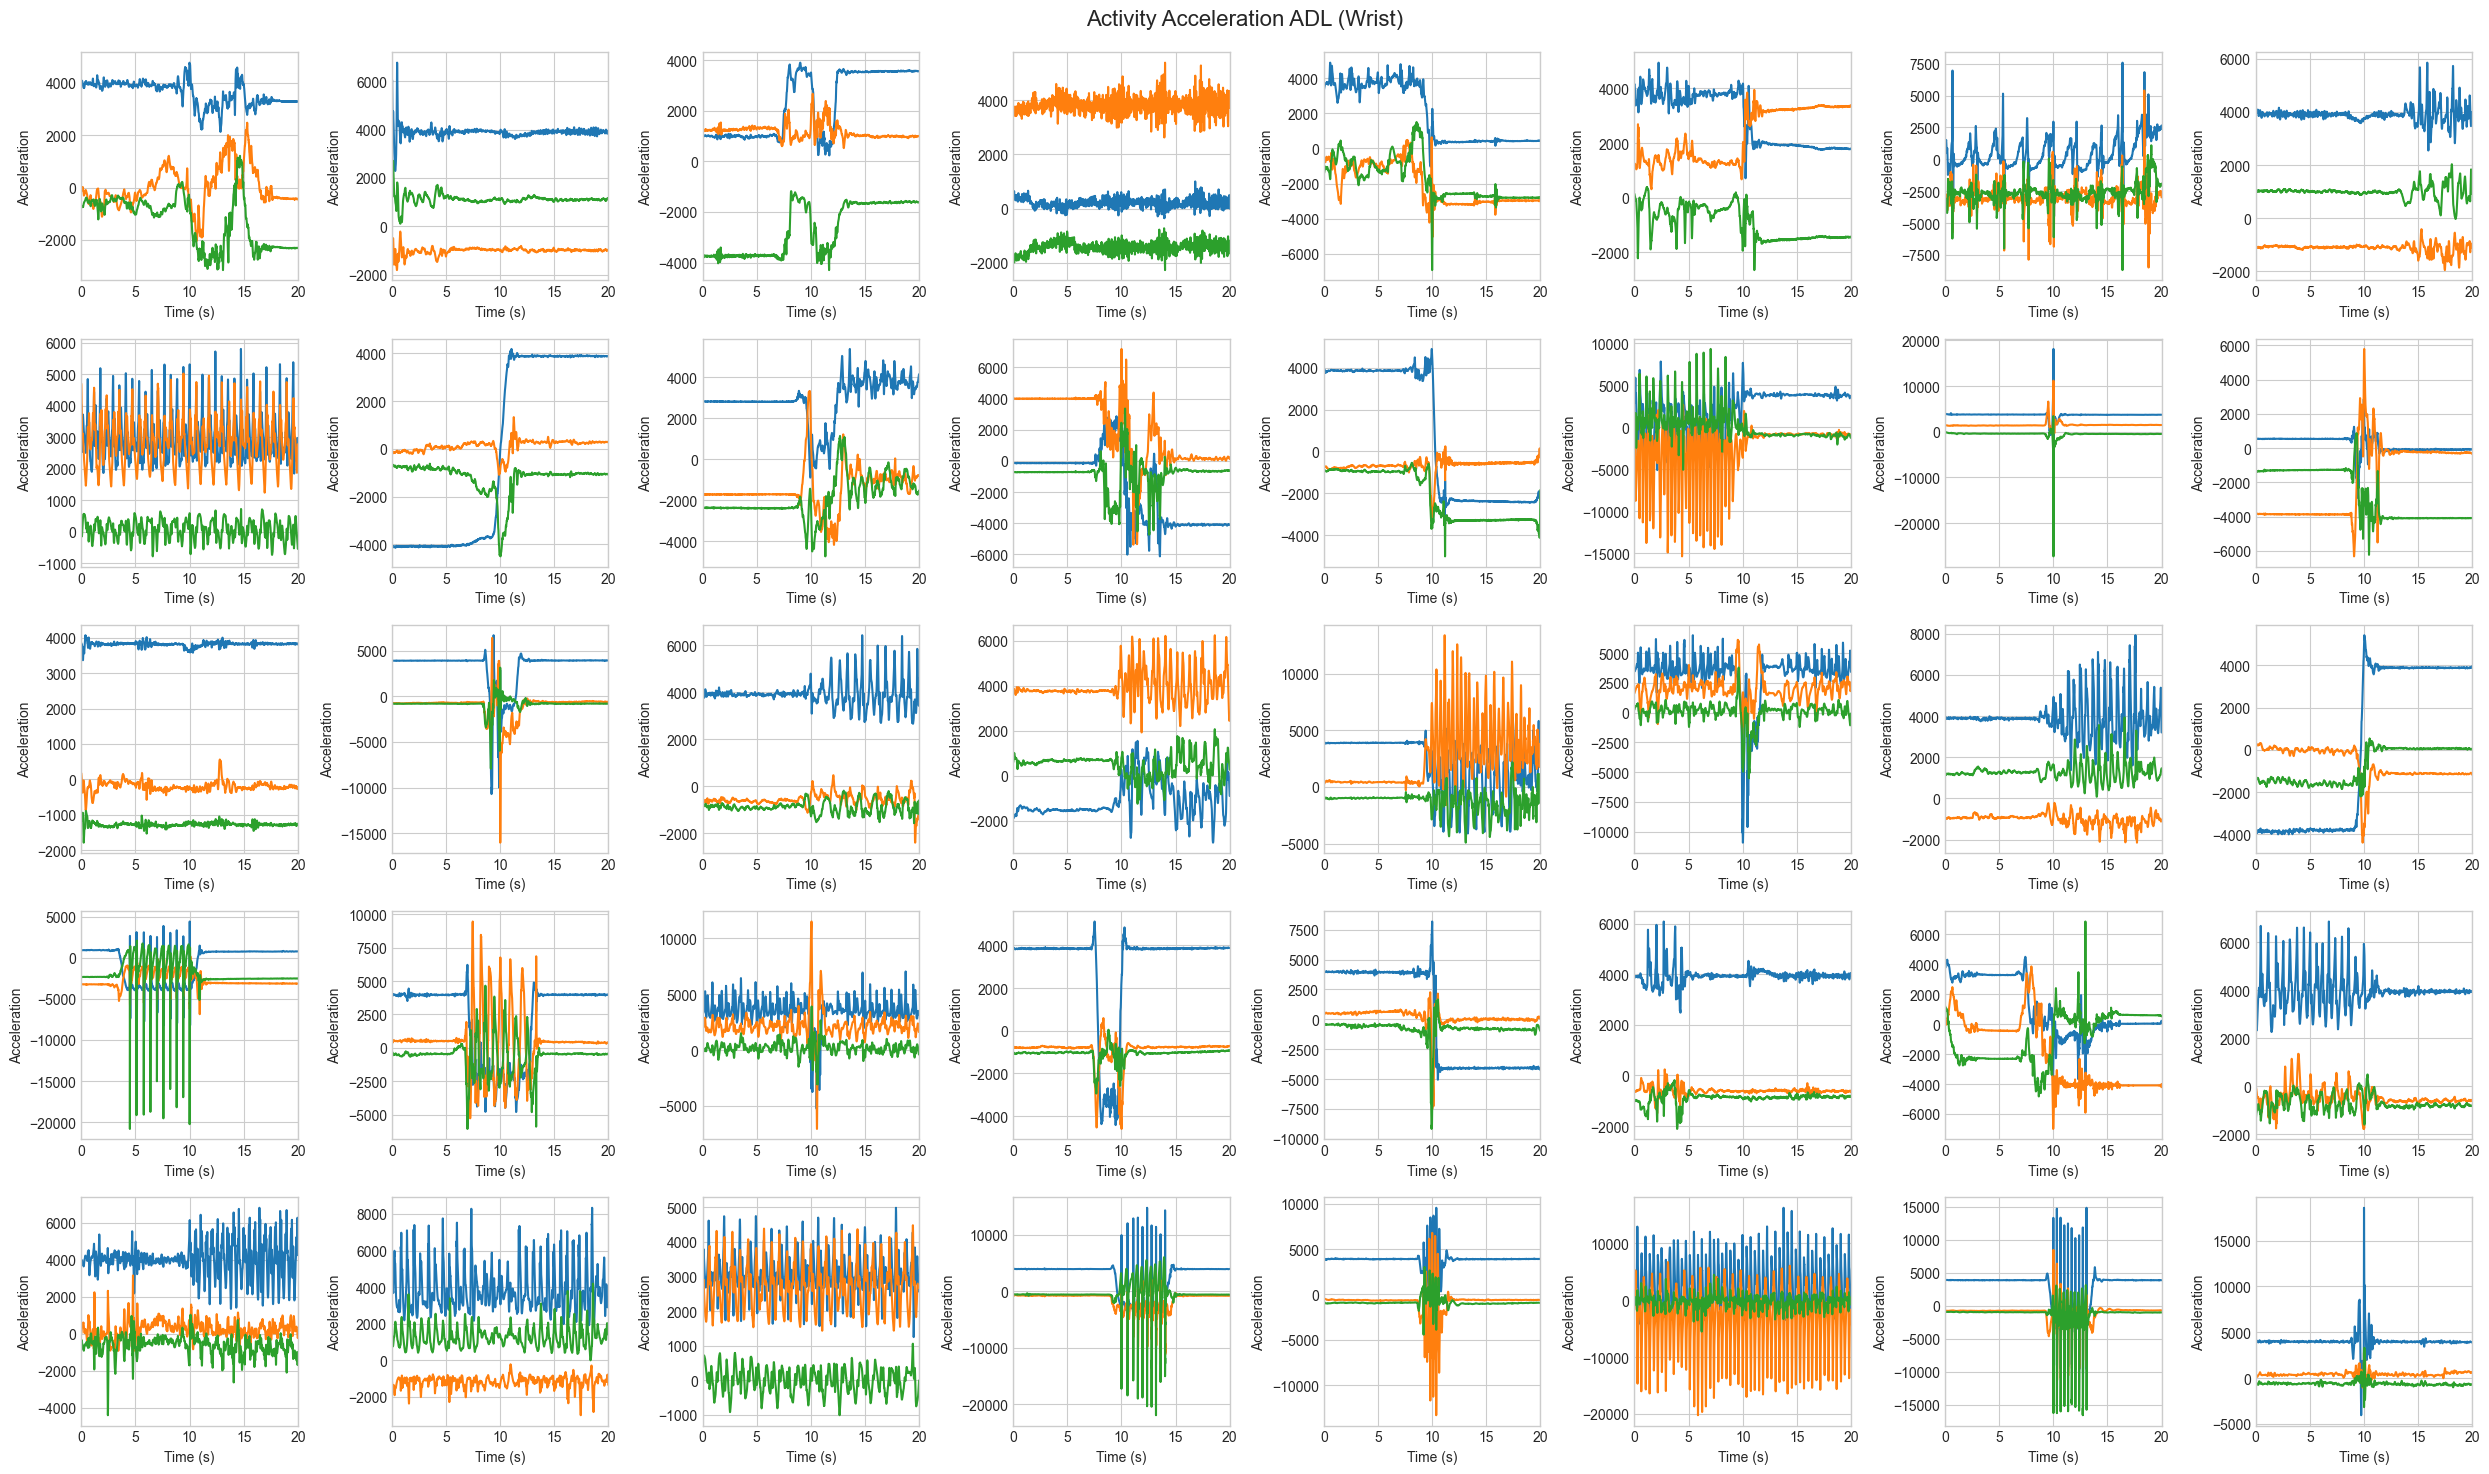

In [19]:
"""
Plot Fall Accerlation of the dataset (Wrist)
"""
sr = 238
df = df_FallAllD_raw[df_FallAllD_raw['Device'] == 'Wrist']

df = df[df['ActivityID'] < 100]
df.reset_index(drop=True, inplace=True)

fig, axs = plt.subplots(5, 8, figsize=(25, 15))
axs = axs.flatten()
for i, v in enumerate(np.random.randint(0, df.shape[0], 40)):
    x = np.arange(0, df.loc[v, 'Acc'].shape[0], 1) / sr
    yx, yy, yz = df.loc[v, 'Acc'][:, 0].tolist(), df.loc[v, 'Acc'][:, 1].tolist(), df.loc[v, 'Acc'][:, 2].tolist()
    # axs[i].set_title(f"Activity: {fallAllD_ActivityID[df.loc[v, 'ActivityID']]}", fontsize=14)
    axs[i].plot(x, yx)
    axs[i].plot(x, yy)
    axs[i].plot(x, yz)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Acceleration')
    axs[i].set_xlim(0, 20)
fig.suptitle(f"Activity Acceleration ADL (Wrist)\n", fontsize=16)
plt.tight_layout()
plt.show()

## Preliminary Data Visualisation

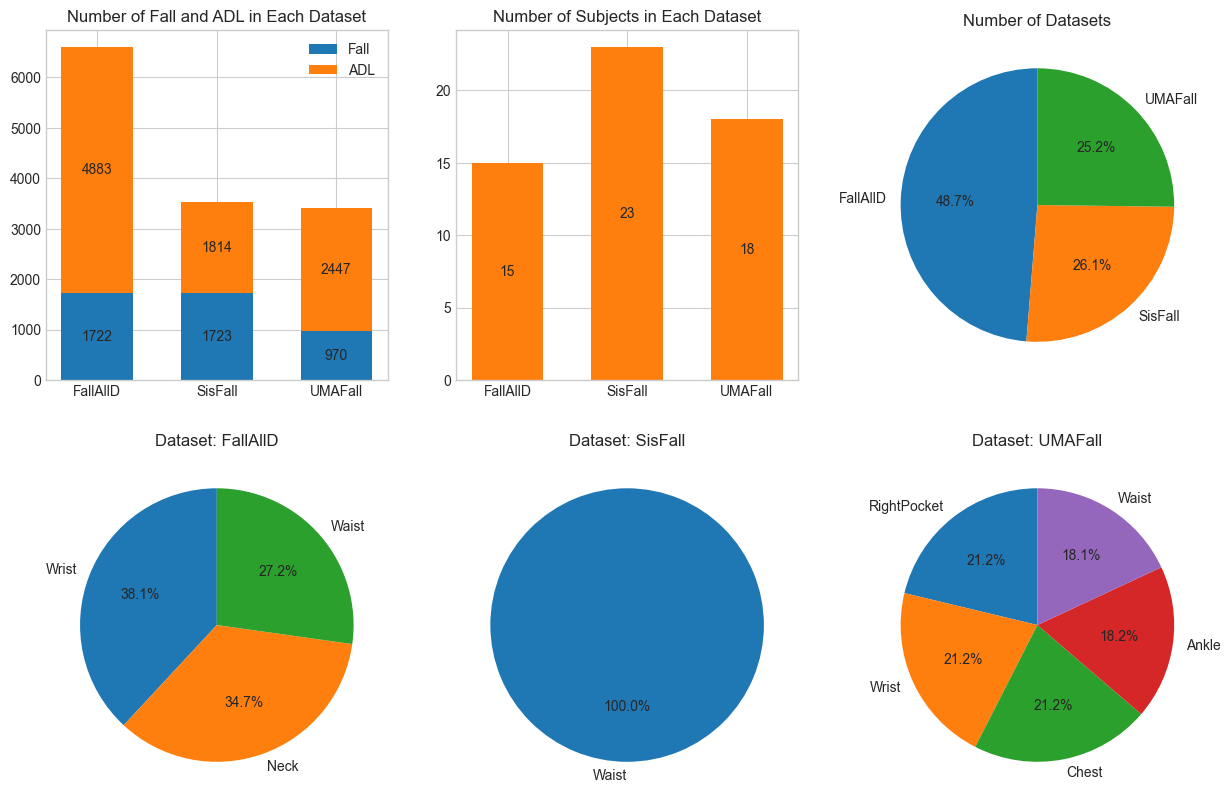

In [5]:
"""
1. Plot the number of fall and ADL in each dataset
2. Plot the number of subjects in each dataset
3. Plot the number of datasets
4. Plot device location in each dataset
"""

dataset = ('FallAllD', 'SisFall', 'UMAFall')
motion_counts = {
    'Fall': np.array([
        df_FallAllD[df_FallAllD['Activity'] == 'Fall'].shape[0], 
        df_SisFall[df_SisFall['Activity'] == 'Fall'].shape[0], 
        df_UMAFall[df_UMAFall['Activity'] == 'Fall'].shape[0]]),
    'ADL': np.array([
        df_FallAllD[df_FallAllD['Activity'] == 'ADL'].shape[0], 
        df_SisFall[df_SisFall['Activity'] == 'ADL'].shape[0], 
        df_UMAFall[df_UMAFall['Activity'] == 'ADL'].shape[0]]),
}
subject_counts = (
    df_FallAllD['SubjectID'].nunique(),
    df_SisFall['SubjectID'].nunique(),
    df_UMAFall['SubjectID'].nunique()
)
dataset_counts = (df_FallAllD.shape[0], df_SisFall.shape[0], df_UMAFall.shape[0])

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
bottom = np.zeros(3)
# red, blue, green, yellow, purple, orange
colors = ["#D32F2F", "#1976D2", "#388E3C", "#FBC02D", "#8E24AA", "#F57C00"]

for motion, motion_count in motion_counts.items():
    p1 = ax[0, 0].bar(dataset, motion_count, width=0.6, label=motion, bottom=bottom)
    bottom += motion_count
    ax[0, 0].bar_label(p1, label_type='center')

ax[0, 0].set_title('Number of Fall and ADL in Each Dataset')
ax[0, 0].legend()

for i, df in enumerate([df_FallAllD, df_SisFall, df_UMAFall]):
    ax[1, i].set_title(f"Dataset: {dataset[i]}")
    df['Device'].value_counts().plot(kind='pie', ax=ax[1, i], autopct='%1.1f%%', startangle=90)
    ax[1, i].get_yaxis().set_visible(False)

p2 = ax[0, 1].bar(dataset, subject_counts, width=0.6, color='#ff7f0e')
ax[0, 1].bar_label(p2, label_type='center')
ax[0, 1].set_title('Number of Subjects in Each Dataset')

ax[0, 2].pie(dataset_counts, labels=dataset, autopct='%1.1f%%', startangle=90)
ax[0, 2].set_title('Number of Datasets')

plt.show()

#### UMAFALL Dataset

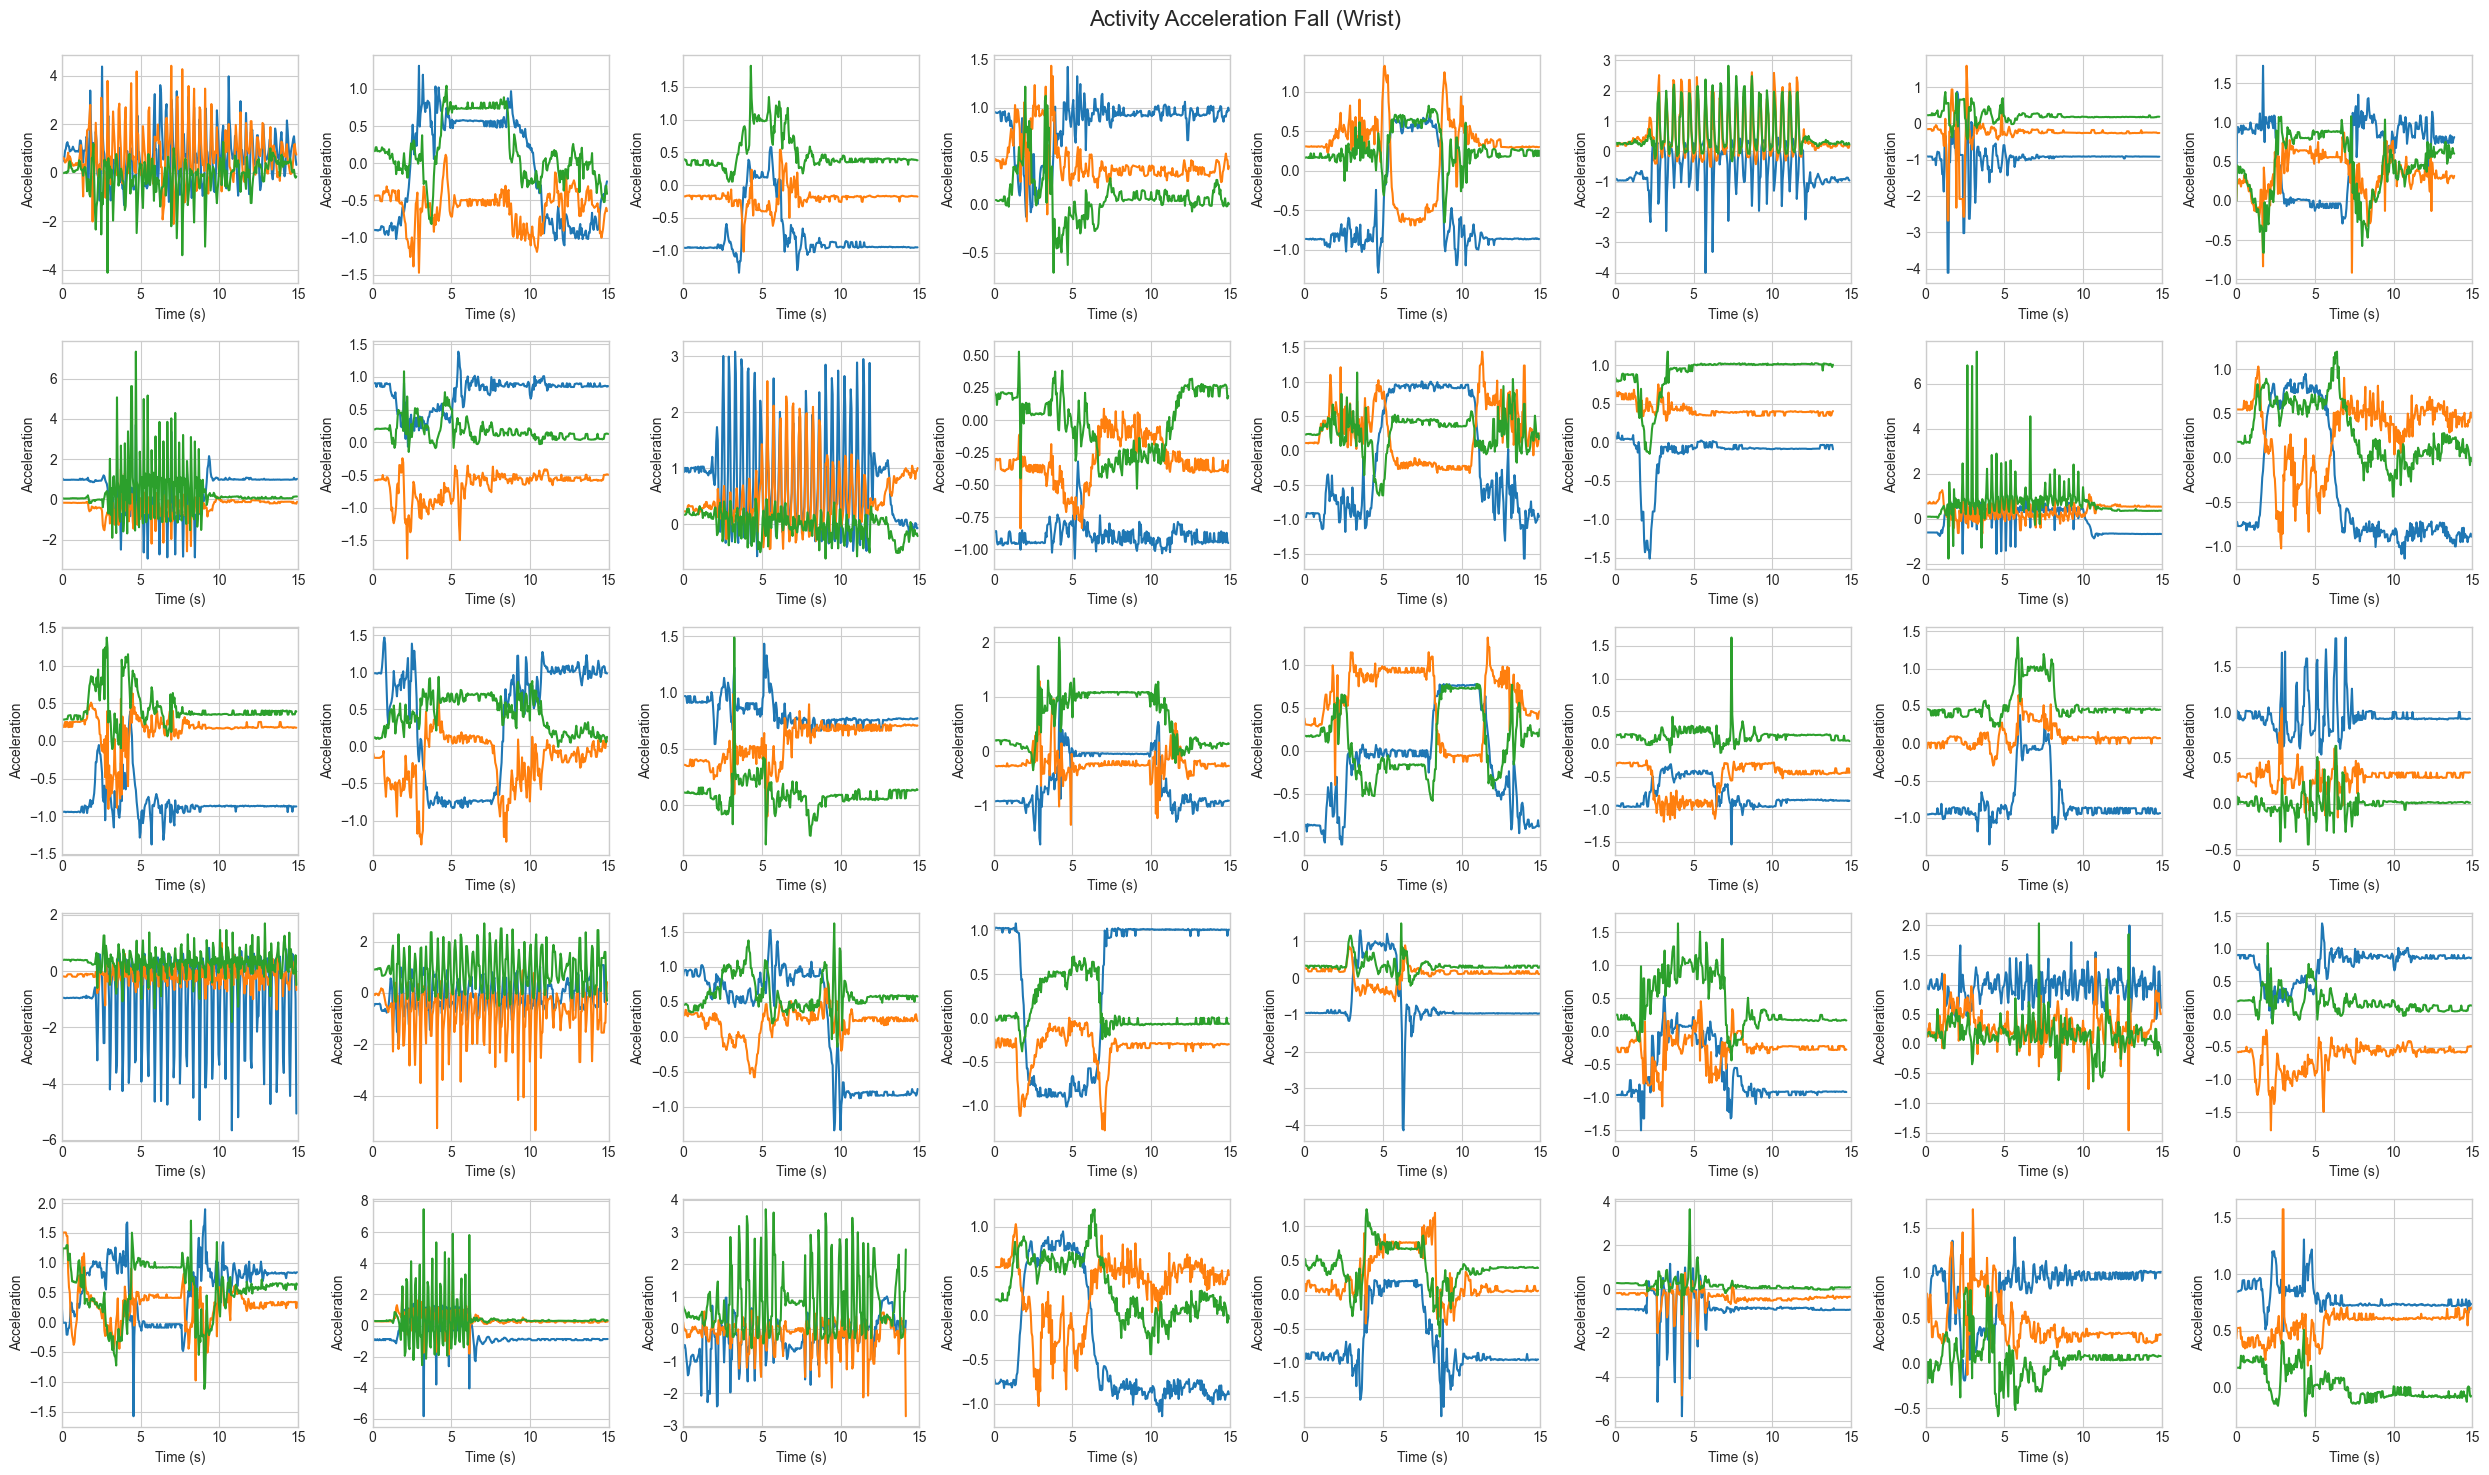

In [16]:
"""
Plot Fall Accerlation of the dataset (Wrist)
"""
sr = 20
df = df_UMAFall[df_UMAFall['Device'] == 'Wrist']

df = df[df['Activity'] == 'ADL']
df.reset_index(drop=True, inplace=True)

fig, axs = plt.subplots(5, 8, figsize=(25, 15))
axs = axs.flatten()
for i, v in enumerate(np.random.randint(0, df.shape[0], 40)):
    x = np.arange(0, df.loc[v, 'Acc'].shape[0], 1) / sr
    yx, yy, yz = df.loc[v, 'Acc'][:, 0].tolist(), df.loc[v, 'Acc'][:, 1].tolist(), df.loc[v, 'Acc'][:, 2].tolist()
    axs[i].plot(x, yx)
    axs[i].plot(x, yy)
    axs[i].plot(x, yz)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Acceleration')
    axs[i].set_xlim(0, 15)
fig.suptitle(f"Activity Acceleration Fall (Wrist)\n", fontsize=16)
plt.tight_layout()
plt.show()

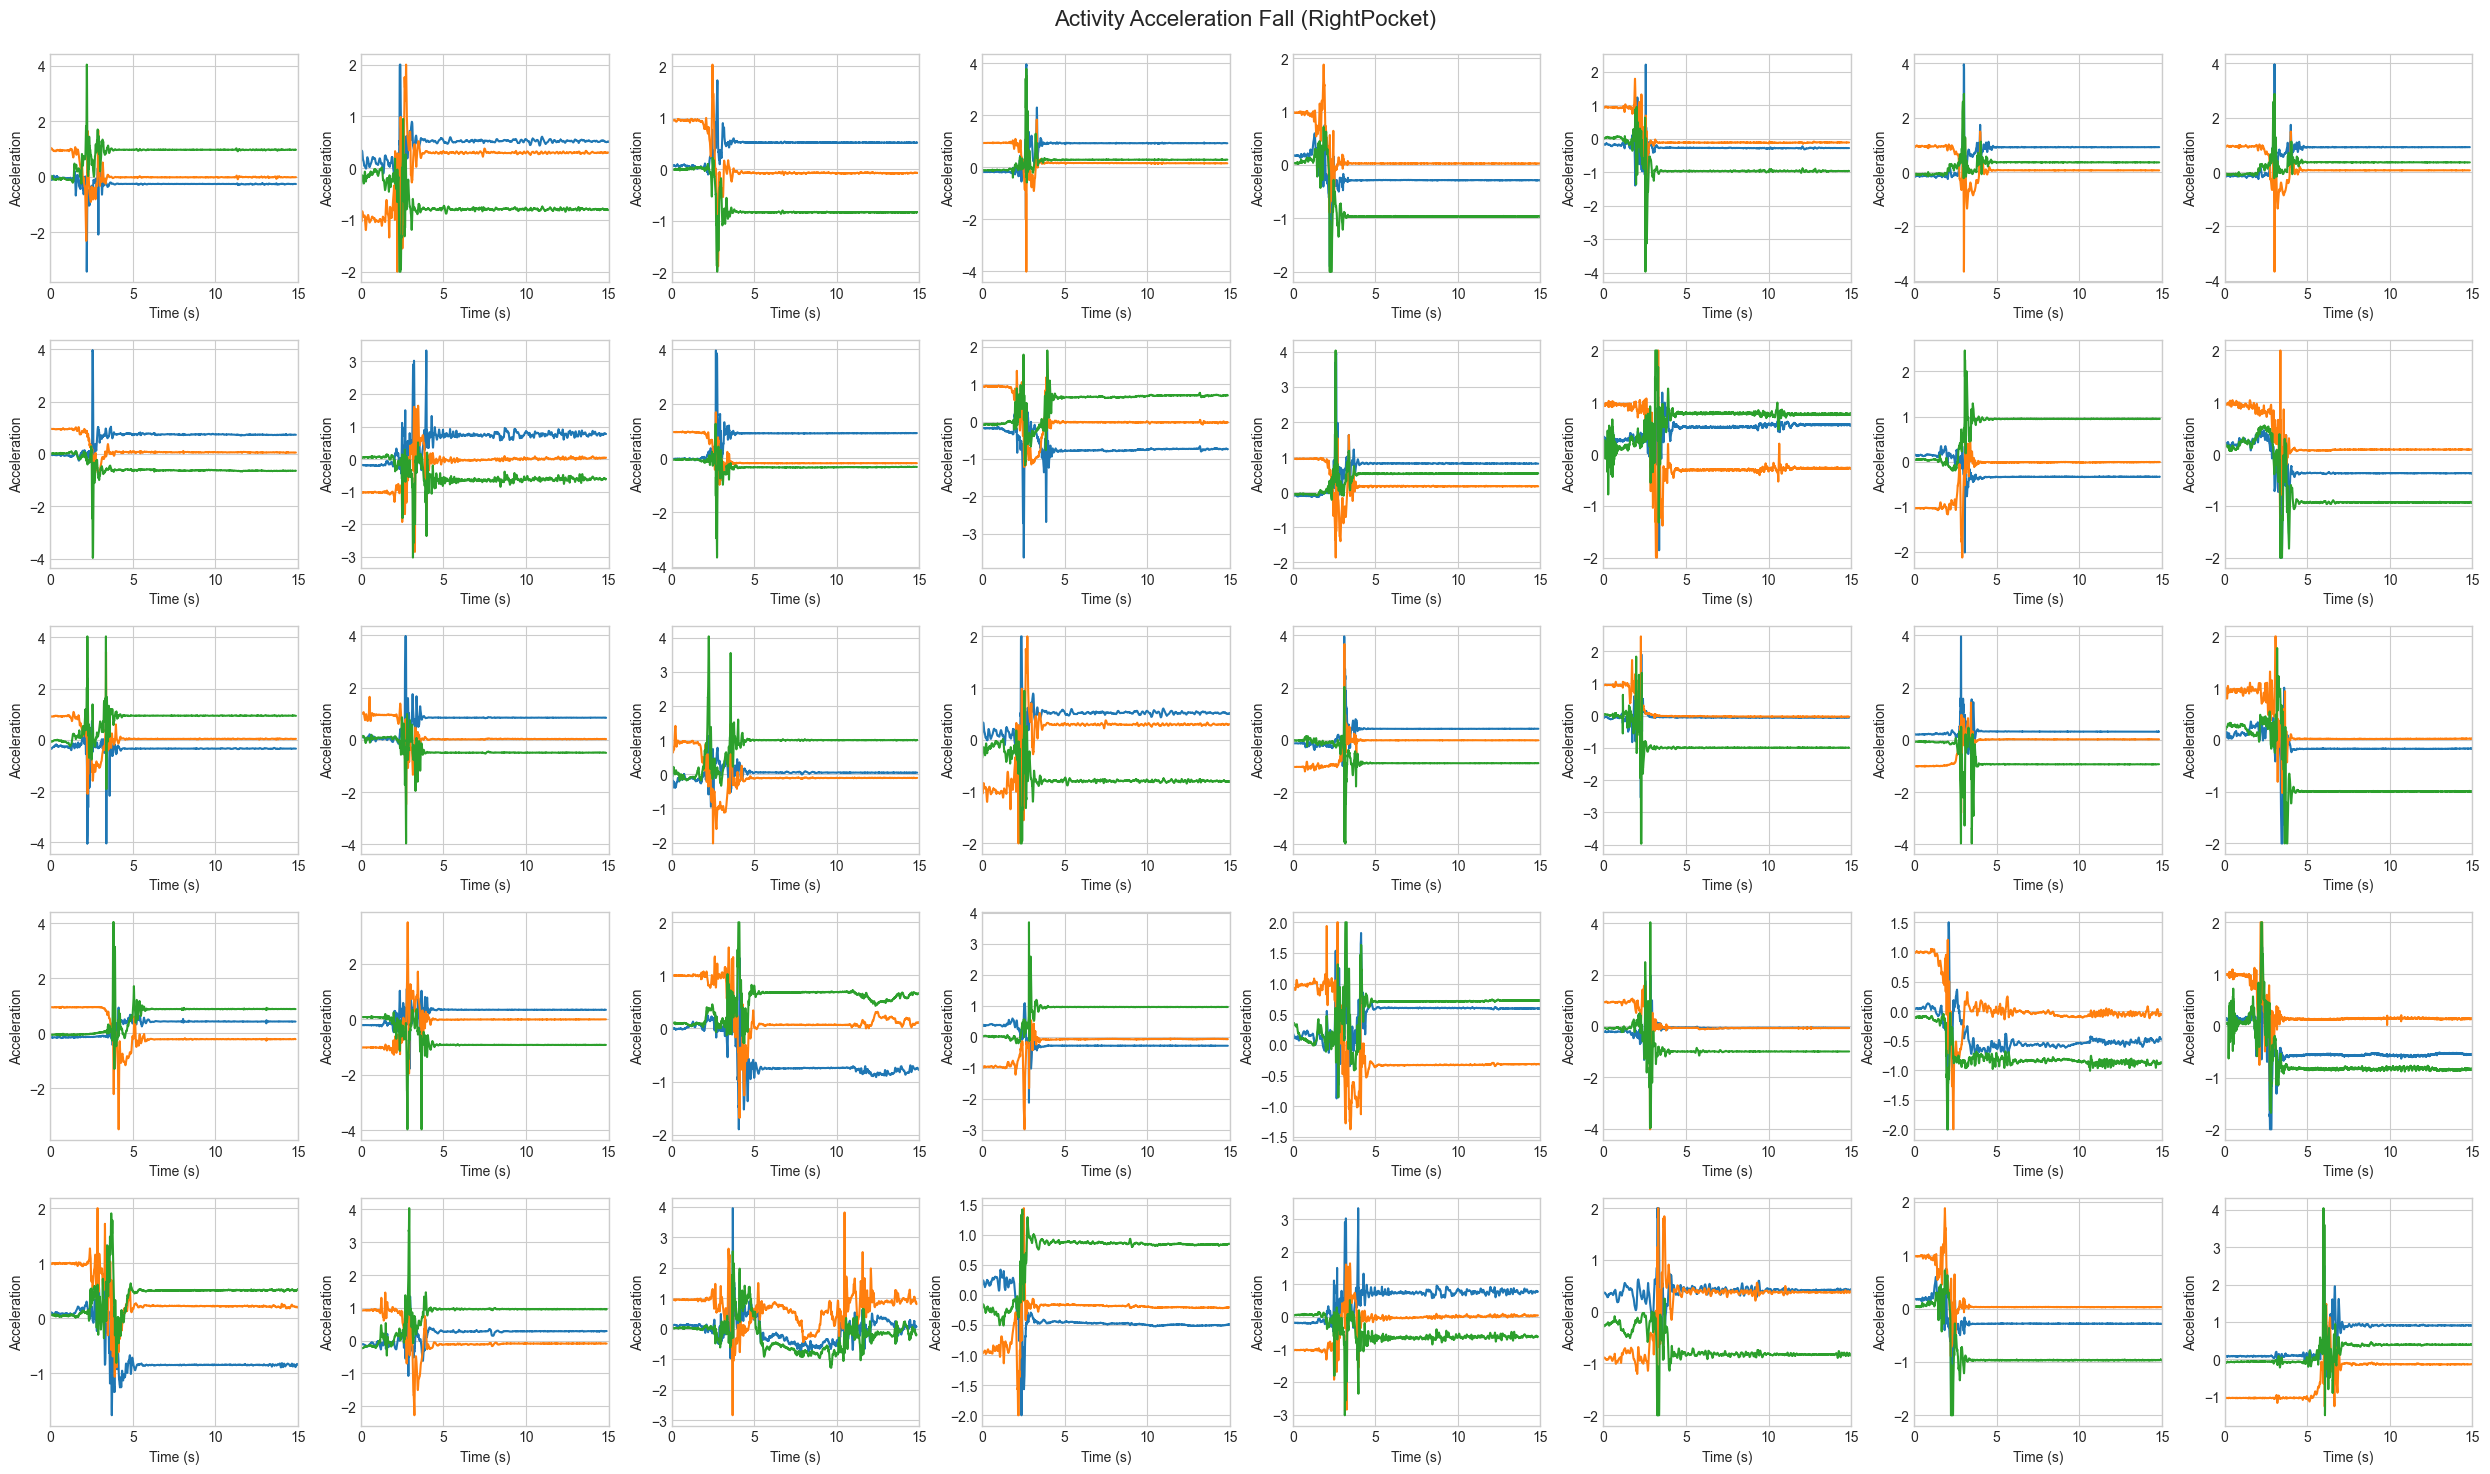

In [14]:
"""
Plot Fall Accerlation of the dataset (RightPocket)
"""
sr = 200
df = df_UMAFall[df_UMAFall['Device'] == 'RightPocket']

df = df[df['Activity'] == 'Fall']
df.reset_index(drop=True, inplace=True)

fig, axs = plt.subplots(5, 8, figsize=(25, 15))
axs = axs.flatten()
for i, v in enumerate(np.random.randint(0, df.shape[0], 40)):
    x = np.arange(0, df.loc[v, 'Acc'].shape[0], 1) / sr
    yx, yy, yz = df.loc[v, 'Acc'][:, 0].tolist(), df.loc[v, 'Acc'][:, 1].tolist(), df.loc[v, 'Acc'][:, 2].tolist()
    axs[i].plot(x, yx)
    axs[i].plot(x, yy)
    axs[i].plot(x, yz)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Acceleration')
    axs[i].set_xlim(0, 15)
fig.suptitle(f"Activity Acceleration Fall (RightPocket)\n", fontsize=16)
plt.tight_layout()
plt.show()